In [1]:
import pickle
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dictionary containing the dataset
print("Loading dataset", end="\t")
with open("dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
    
data_raw = pd.DataFrame.from_dict(data_dict, orient="index")

Loading dataset	

#### Make a copy of raw dataframe

In [2]:
df = data_raw.copy()

#### Wrangle and Clean

In [3]:
df.head(3)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object

###### Issues to correct
- `email_address` column is not necessary.
- All columns must be float.

###### Correcting

In [5]:
# Dropping Email Address
drop_columns = ["email_address"]
df_clean = data_raw.drop(drop_columns, axis=1)

In [6]:
# Parsing to float
df_clean = df_clean.astype(np.float64)

###### Check

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   restricted_stock_deferred  18 non-null     float64
 7   deferred_income            49 non-null     float64
 8   total_stock_value          126 non-null    float64
 9   expenses                   95 non-null     float64
 10  from_poi_to_this_person    86 non-null     float64
 11  exercised_stock_options    102 non-null    float64
 12  from_messages              86 non-null     float64
 13  other                      93 non-

###### Issues to correct
- Null values in all X columns

In [8]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,95.0,5.621943e+05,2.716369e+06,477.0,211816.00,259996.0,312117.00,26704229.0
to_messages,86.0,2.073860e+03,2.582701e+03,57.0,541.25,1211.0,2634.75,15149.0
deferral_payments,39.0,1.642674e+06,5.161930e+06,-102500.0,81573.00,227449.0,1002671.50,32083396.0
total_payments,125.0,5.081526e+06,2.906172e+07,148.0,394475.00,1101393.0,2093263.00,309886585.0
loan_advances,4.0,4.196250e+07,4.708321e+07,400000.0,1600000.00,41762500.0,82125000.00,83925000.0
bonus,82.0,2.374235e+06,1.071333e+07,70000.0,431250.00,769375.0,1200000.00,97343619.0
restricted_stock_deferred,18.0,1.664106e+05,4.201494e+06,-7576788.0,-389621.75,-146975.0,-75009.75,15456290.0
deferred_income,49.0,-1.140475e+06,4.025406e+06,-27992891.0,-694862.00,-159792.0,-38346.00,-833.0
total_stock_value,126.0,6.773957e+06,3.895777e+07,-44093.0,494510.25,1102872.5,2949846.75,434509511.0
expenses,95.0,1.087289e+05,5.335348e+05,148.0,22614.00,46950.0,79952.50,5235198.0


###### Issues to correct
- Negative values in `deferral_payemnts`, `restricted_stock`, `total_stock_value`.

In [9]:
df_clean[
    (df_clean["deferral_payments"] < 0) |
    (df_clean["restricted_stock"] < 0) |
    (df_clean["total_stock_value"] < 0)
]

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,NaN,NaN,44093.0,NaN,-44093.0,NaN,NaN,3285.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3285.0
BHATNAGAR SANJAY,NaN,523.0,NaN,15456290.0,NaN,NaN,15456290.0,NaN,NaN,NaN,0.0,2604490.0,29.0,137864.0,1.0,0.0,NaN,463.0,-2604490.0,137864.0


###### Issues to correct
- Negative values in `deferral_payemnts`, `restricted_stock`, `total_stock_value`.
    - Cause: Shifted columns for `BELFER ROBERT` and `BHATNAGAR SANJAY`

In [10]:
# Class Column
class_column = ["poi"]

# Input Columns
# Email
from_columns = ["from_poi_to_this_person", "from_messages"]
to_columns = ["from_this_person_to_poi", "to_messages"]
shared_columns = ["shared_receipt_with_poi"]
email_columns = from_columns + to_columns + shared_columns

# Payment
payment_columns = [
    "salary", 
    "bonus", 
    "long_term_incentive", 
    "deferred_income", 
    "deferral_payments", 
    "loan_advances", 
    "other", 
    "expenses", 
    "director_fees", 
    "total_payments"
]

# Stock
stock_columns = [
    "exercised_stock_options", 
    "restricted_stock", 
    "restricted_stock_deferred", 
    "total_stock_value"
]

# Other
other_columns = list(filter(
    lambda col: col not in payment_columns + stock_columns + email_columns + class_column, 
    df_clean.columns
))

In [11]:
# Shift columns for Belfer Robert and Bhatnagar
shift_belfer = df_clean.loc["BELFER ROBERT", payment_columns + stock_columns].shift(-1)
shift_bhatnagar = df_clean.loc["BHATNAGAR SANJAY", payment_columns + stock_columns].shift(1)

df_clean.loc["BELFER ROBERT", payment_columns+stock_columns] = shift_belfer
df_clean.loc["BHATNAGAR SANJAY", payment_columns+stock_columns] = shift_bhatnagar

In [12]:
# Fill NaN with zeroes
df_clean.fillna(0., inplace=True)

In [13]:
# Check whether there are totals different from the sum of the parts
# Payments -------------
payments_total = payment_columns[-1]
payments_parts = payment_columns[:-1]

not_matching_payments = (df_clean[payments_parts].sum(axis=1) != df_clean[payments_total])
not_matching_payments_count = not_matching_payments.sum()

# Stocks -------------
stocks_total = stock_columns[-1]
stocks_parts = stock_columns[:-1]

not_matching_stocks = (df_clean[stocks_parts].sum(axis=1) != df_clean[stocks_total])
not_matching_stocks_count = not_matching_stocks.sum()

not_matching_payments_count, not_matching_stocks_count

(0, 0)

In [61]:
def plot_histograms(columns, df):
    n_cols = 4
    n_rows = int(np.ceil(len(columns) / n_cols))
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 3*n_rows))
    axs = axs.flat

    for i, axi in enumerate(axs):
        if i >= len(columns):
            continue

        column_i = columns[i]
        sns.histplot(data=df, x=column_i, hue="poi", multiple="stack", bins=100, ax=axi, legend=i==0)

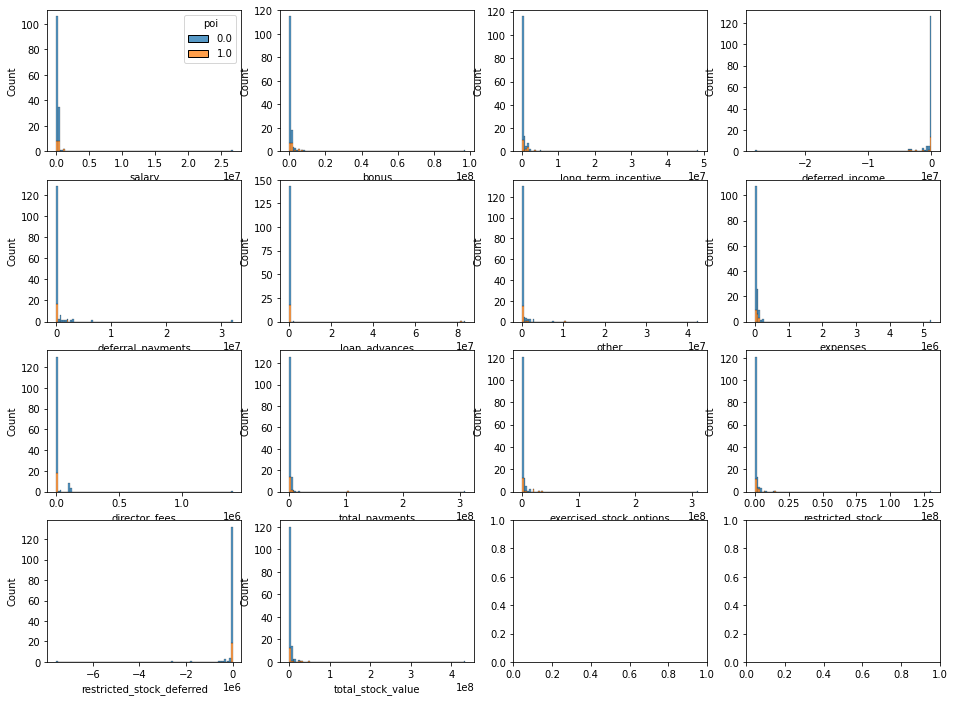

In [62]:
plot_histograms((payment_columns + stock_columns), df_clean)

In [64]:
df_clean.sort_values(by="loan_advances", ascending=False).head(3)[["loan_advances"]]

,loan_advances
TOTAL,83925000.0
LAY KENNETH L,81525000.0
FREVERT MARK A,2000000.0


###### Issues to correct
- Total is not a proper employee.

In [65]:
people_to_drop = ["TOTAL"]
df_clean = df_clean[~df_clean.index.isin(people_to_drop)]

#### Save clean Data

In [66]:
df_clean.to_pickle("clean_data.pkl")

In [76]:
def create_ratio_column(df, denominator, *numerators):
    for numerator in numerators:
        ratio_column_name = numerator + "_ratio"
        ratio_series = df[numerator] / df[denominator]
        ratio_series = ratio_series.replace(np.inf, np.nan)\
            .replace(-np.inf, np.nan)\
            .fillna(0.)
            
        df[ratio_column_name] = ratio_series

In [100]:
data = pd.DataFrame({
    "custo_1": [10, 20],
    "custo_2": [1, 3],
    "custo_3": [9, 3],
    "custo_4": [11, 13],
    "custo_5": [14, 33],
    "custo_6": [12, 34],
    "total": [100, 300]
})

data

,custo_1,custo_2,custo_3,custo_4,custo_5,custo_6,total
0,10,1,9,11,14,12,100
1,20,3,3,13,33,34,300


In [101]:
create_ratio_column(data, "total", "custo_1", "custo_2", "custo_3", "custo_4", "custo_5", "custo_6")

In [102]:
data

,custo_1,custo_2,custo_3,custo_4,custo_5,custo_6,total,custo_1_ratio,custo_2_ratio,custo_3_ratio,custo_4_ratio,custo_5_ratio,custo_6_ratio
0,10,1,9,11,14,12,100,0.100000,0.01,0.09,0.110000,0.14,0.120000
1,20,3,3,13,33,34,300,0.066667,0.01,0.01,0.043333,0.11,0.113333


In [111]:
cv = 3

if cv:
    print("Cross Validation Applied")

else:
    print("No Cross Validation")

Cross Validation Applied


In [117]:
index_selection = False -> kbest = False

index_selection is list -> kbest = True



True

In [120]:
index_selection = [8, 10, 11, 12]



True